In [32]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
ds2014 = pd.read_csv("dataset/2015_Financial_Data.csv")

### Check if we have some NaN values

In [34]:
print(ds2014.info())
print(ds2014.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4120 entries, 0 to 4119
Columns: 225 entries, Unnamed: 0 to Class
dtypes: float64(222), int64(1), object(2)
memory usage: 7.1+ MB
None
            Revenue  Revenue Growth  Cost of Revenue  Gross Profit  \
count  4.053000e+03     3780.000000     3.927000e+03  4.055000e+03   
mean   5.005532e+09        0.289257     3.194520e+09  1.884870e+09   
std    3.455765e+10        3.579223     2.837197e+10  8.398565e+09   
min   -3.357020e+08       -1.064300    -2.665346e+09 -1.280800e+10   
25%    5.867900e+07       -0.051950     2.840826e+06  2.792500e+07   
50%    4.083450e+08        0.031850     1.448460e+08  1.783760e+08   
75%    2.219136e+09        0.160325     1.153572e+09  8.336660e+08   
max    1.886894e+12      189.817900     1.581527e+12  3.053670e+11   

       R&D Expenses  SG&A Expense  Operating Expenses  Operating Income  \
count  3.855000e+03  3.950000e+03        3.946000e+03      4.078000e+03   
mean   9.605866e+07  8.390737e+08 

/Users/josip/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


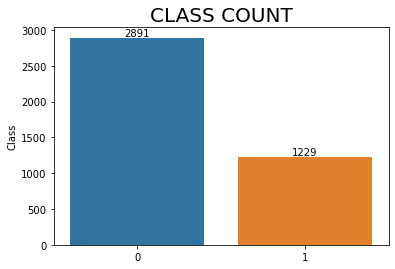

In [35]:
# Plot class distribution
df_class = ds2014['Class'].value_counts()
plotClass = sns.barplot(np.arange(len(df_class)), df_class)
plotClass.bar_label(plotClass.containers[0])
plt.title('CLASS COUNT', fontsize=20)
plt.show()

Because of the classes we can see which ones are buy-worthy and which not. So 2174 are not buy-worthy since "Class" = 0, and the other 1634 are "Class = 1".

/Users/josip/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


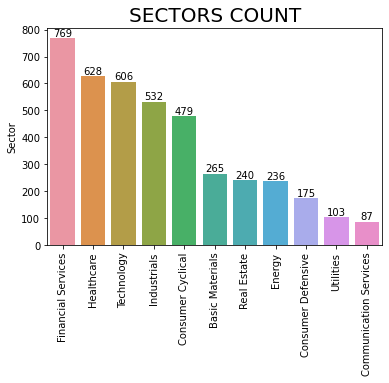

In [36]:
# Plot sector distribution
df_sector = ds2014['Sector'].value_counts()
plotSector = sns.barplot(np.arange(len(df_sector)), df_sector)
plotSector.bar_label(plotSector.containers[0])
plt.xticks(np.arange(len(df_sector)), df_sector.index.values.tolist(), rotation=90)
plt.title('SECTORS COUNT', fontsize=20)
plt.show()

In [52]:
dfp = ds2014.loc[:, ['Sector', '2016 PRICE VAR [%]']]
sector_list = dfp["Sector"].unique()
for sector in sector_list:

    temp = dfp[dfp['Sector'] == sector]

    plt.figure(figsize=(30,5))
    plt.plot(temp['2016 PRICE VAR [%]'])
    plt.title(sector.upper(), fontsize=20)
    plt.show()

KeyError: "['2016 PRICE VAR [%]'] not in index"

### looking for missing values and how to handle them

In [38]:
ds2014 = ds2014[ds2014["2016 PRICE VAR [%]"]<500]


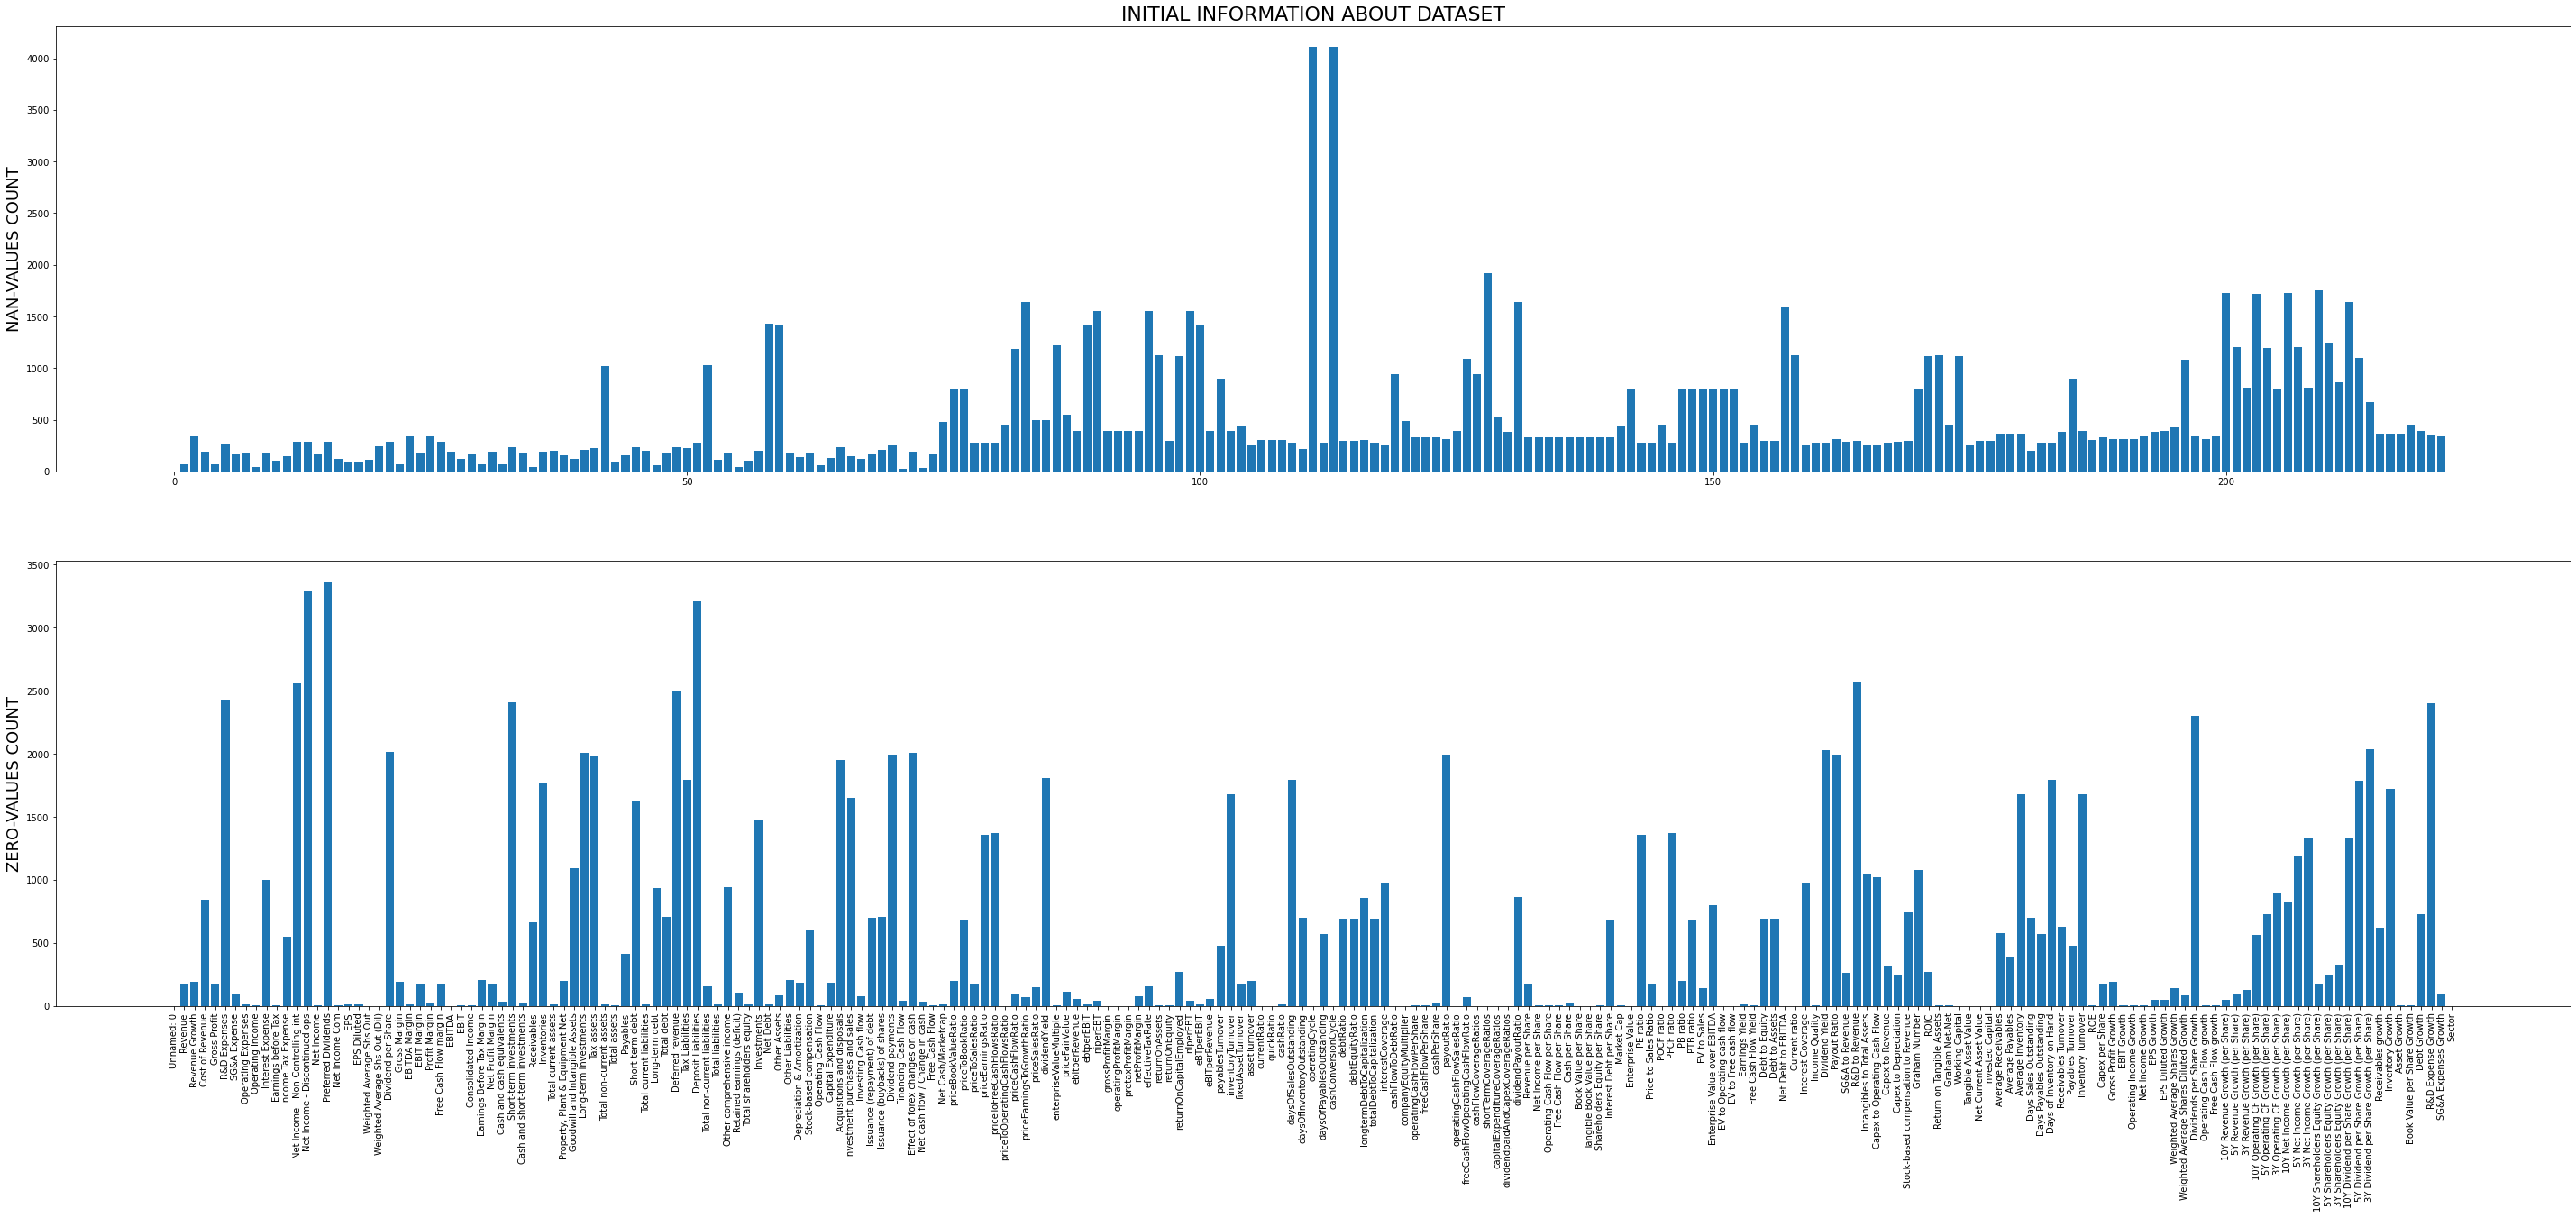

In [39]:
# Drop columns relative to classification, we will use them later
class_data = ds2014.loc[:, ['Class', '2016 PRICE VAR [%]']]
ds2014.drop(['Class', '2016 PRICE VAR [%]'], inplace=True, axis=1)

# Plot initial status of data quality in terms of nan-values and zero-values
nan_vals = ds2014.isna().sum()
zero_vals = ds2014.isin([0]).sum()
ind = np.arange(ds2014.shape[1])

plt.figure(figsize=(50,20))

plt.subplot(2,1,1)
plt.title('INITIAL INFORMATION ABOUT DATASET', fontsize=22)
plt.bar(ind, nan_vals.values.tolist())
plt.ylabel('NAN-VALUES COUNT', fontsize=18)

plt.subplot(2,1,2)
plt.bar(ind, zero_vals.values.tolist())
plt.ylabel('ZERO-VALUES COUNT', fontsize=18)
plt.xticks(ind, nan_vals.index.values, rotation='90')

plt.show()

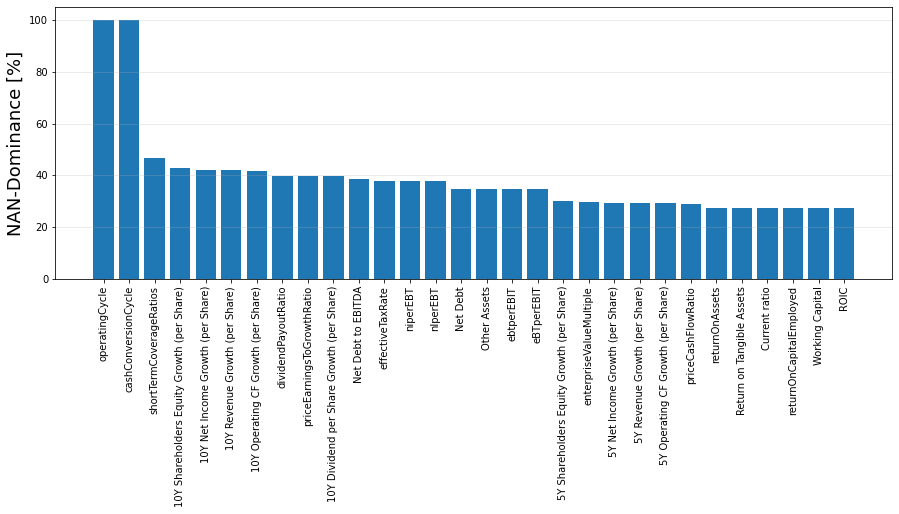

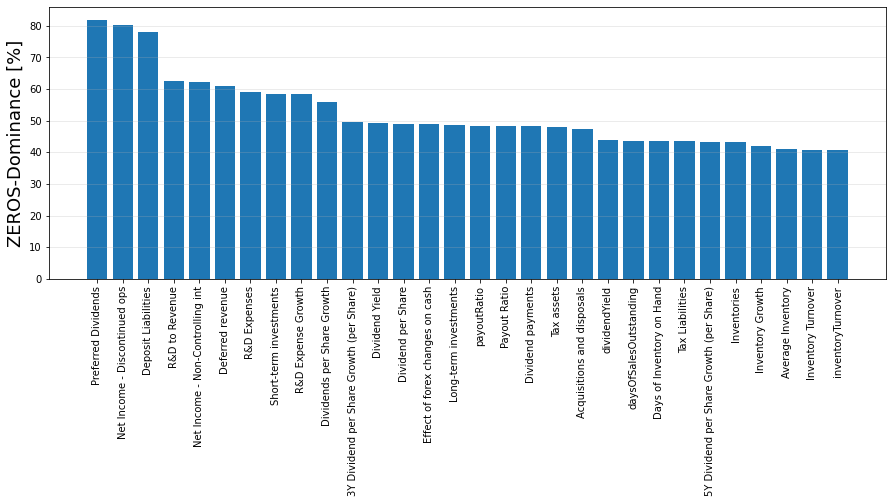

In [40]:
# Find count and percent of nan-values, zero-values
total_nans = ds2014.isnull().sum().sort_values(ascending=False)
percent_nans = (ds2014.isnull().sum()/ds2014.isnull().count() * 100).sort_values(ascending=False)
total_zeros = ds2014.isin([0]).sum().sort_values(ascending=False)
percent_zeros = (ds2014.isin([0]).sum()/ds2014.isin([0]).count() * 100).sort_values(ascending=False)
df_nans = pd.concat([total_nans, percent_nans], axis=1, keys=['Total NaN', 'Percent NaN'])
df_zeros = pd.concat([total_zeros, percent_zeros], axis=1, keys=['Total Zeros', 'Percent Zeros'])

# Graphical representation
plt.figure(figsize=(15,5))
plt.bar(np.arange(30), df_nans['Percent NaN'].iloc[:30].values.tolist())
plt.xticks(np.arange(30), df_nans['Percent NaN'].iloc[:30].index.values.tolist(), rotation='90')
plt.ylabel('NAN-Dominance [%]', fontsize=18)
plt.grid(alpha=0.3, axis='y')
plt.show()

plt.figure(figsize=(15,5))
plt.bar(np.arange(30), df_zeros['Percent Zeros'].iloc[:30].values.tolist())
plt.xticks(np.arange(30), df_zeros['Percent Zeros'].iloc[:30].index.values.tolist(), rotation='90')
plt.ylabel('ZEROS-Dominance [%]', fontsize=18)
plt.grid(alpha=0.3, axis='y')
plt.show()

In [41]:
# Find reasonable threshold for nan-values situation
test_nan_level = 0.5
print(df_nans.quantile(test_nan_level))
_, thresh_nan = df_nans.quantile(test_nan_level)

# Find reasonable threshold for zero-values situation
test_zeros_level = 0.6
print(df_zeros.quantile(test_zeros_level))
_, thresh_zeros = df_zeros.quantile(test_zeros_level)

Total NaN      311.00000
Percent NaN      7.56691
Name: 0.5, dtype: float64
Total Zeros      249.800000
Percent Zeros      6.077859
Name: 0.6, dtype: float64


In [42]:
# Clean dataset applying thresholds for both zero values, nan-values
print(f'INITIAL NUMBER OF VARIABLES: {ds2014.shape[1]}')
print()

df_test1 = ds2014.drop((df_nans[df_nans['Percent NaN'] > thresh_nan]).index, 1)
print(f'NUMBER OF VARIABLES AFTER NaN THRESHOLD {thresh_nan:.2f}%: {df_test1.shape[1]}')
print()

df_zeros_postnan = df_zeros.drop((df_nans[df_nans['Percent NaN'] > thresh_nan]).index, axis=0)
df_test2 = df_test1.drop((df_zeros_postnan[df_zeros_postnan['Percent Zeros'] > thresh_zeros]).index, 1)
print(f'NUMBER OF VARIABLES AFTER Zeros THRESHOLD {thresh_zeros:.2f}%: {df_test2.shape[1]}')

INITIAL NUMBER OF VARIABLES: 223

NUMBER OF VARIABLES AFTER NaN THRESHOLD 7.57%: 112

NUMBER OF VARIABLES AFTER Zeros THRESHOLD 6.08%: 55


/var/folders/7k/9x94hbs904jgh5ymqv00n1rh0000gn/T/ipykernel_60387/3911516031.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_test1 = ds2014.drop((df_nans[df_nans['Percent NaN'] > thresh_nan]).index, 1)
/var/folders/7k/9x94hbs904jgh5ymqv00n1rh0000gn/T/ipykernel_60387/3911516031.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_test2 = df_test1.drop((df_zeros_postnan[df_zeros_postnan['Percent Zeros'] > thresh_zeros]).index, 1)


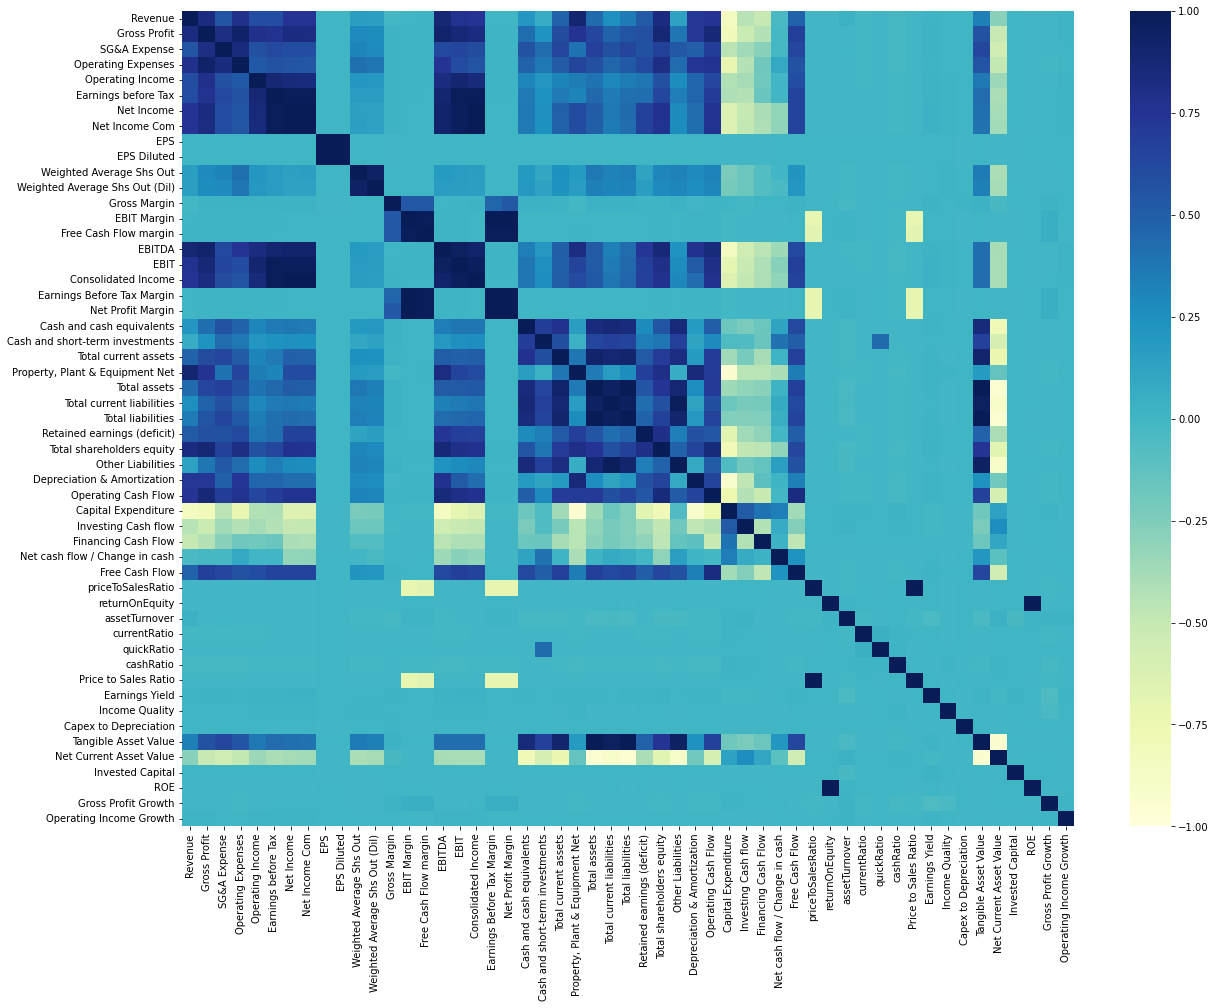

In [43]:
# Plot correlation matrix
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(df_test2.corr(), annot=False, cmap='YlGnBu', vmin=-1, vmax=1, center=0, ax=ax)
plt.show()

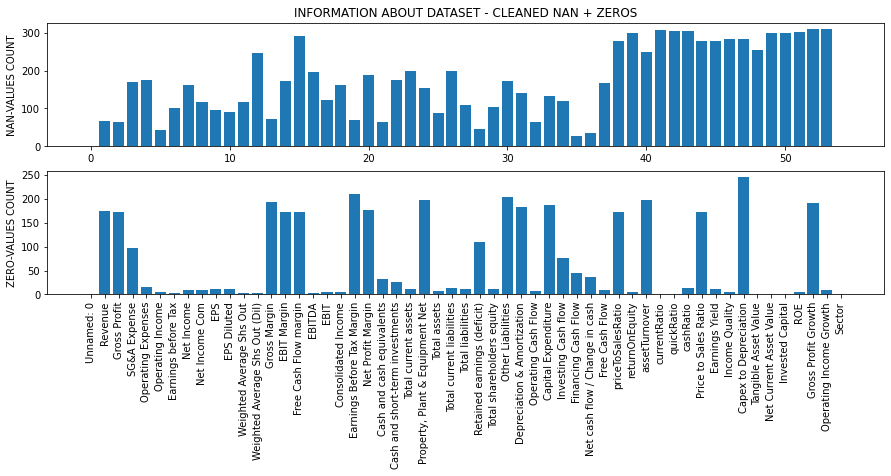

In [44]:
plt.figure(figsize=(15,5))
plt.subplot(2,1,1)
plt.title('INFORMATION ABOUT DATASET - CLEANED NAN + ZEROS', fontsize=12)
plt.bar(np.arange(df_test2.shape[1]), df_test2.isnull().sum())
plt.ylabel('NAN-VALUES COUNT', fontsize=10)

plt.subplot(2,1,2)
plt.bar(np.arange(df_test2.shape[1]), df_test2.isin([0]).sum())
plt.ylabel('ZERO-VALUES COUNT', fontsize=10)
plt.xticks(np.arange(df_test2.shape[1]), df_test2.columns.values, rotation='90')

plt.show()

In [45]:
df_test2.describe()

,Revenue,Gross Profit,SG&A Expense,Operating Expenses,Operating Income,Earnings before Tax,Net Income,Net Income Com,EPS,EPS Diluted,...,Price to Sales Ratio,Earnings Yield,Income Quality,Capex to Depreciation,Tangible Asset Value,Net Current Asset Value,Invested Capital,ROE,Gross Profit Growth,Operating Income Growth
count,4.044000e+03,4.045000e+03,3.941000e+03,3.936000e+03,4.068000e+03,4.008000e+03,3.948000e+03,3.992000e+03,4.015000e+03,4.021000e+03,...,3831.000000,3832.000000,3828.000000,3827.000000,3.855000e+03,3.811000e+03,3.810000e+03,3.809000e+03,3799.000000,3799.000000
mean,5.014197e+09,1.888666e+09,8.404647e+08,1.358921e+09,5.084145e+08,4.103346e+08,3.264726e+08,3.247344e+08,-2.344509e+04,-2.341015e+04,...,203.104416,-0.340639,1.349685,-11.544063,1.596411e+10,-8.308224e+09,-2.151250e+12,2.167484e+03,0.204126,-0.830852
std,3.459551e+10,8.408546e+09,3.491097e+09,5.200467e+09,2.777586e+09,2.427155e+09,2.296813e+09,2.280862e+09,1.214629e+06,1.213723e+06,...,6770.891342,5.909632,25.585501,460.279251,1.089399e+11,6.171266e+10,1.338659e+14,1.337709e+05,5.289305,33.178325
min,-3.357020e+08,-1.280800e+10,0.000000e+00,-5.495512e+09,-1.933900e+10,-1.910900e+10,-1.456700e+10,-1.473800e+10,-7.534036e+07,-7.534036e+07,...,0.000000,-244.000000,-526.000000,-28088.976300,-8.353604e+09,-1.303347e+12,-8.262880e+15,-9.693878e+02,-224.482800,-1514.642900
25%,5.871850e+07,2.802600e+07,1.715800e+07,3.423575e+07,-5.739133e+06,-1.049509e+07,-1.022876e+07,-1.102298e+07,-5.000000e-01,-5.000000e-01,...,0.691500,-0.052825,0.338400,-1.572700,1.606565e+08,-1.551584e+09,8.972925e+07,-7.210000e-02,-0.055900,-0.368000
50%,4.097675e+08,1.784170e+08,7.560000e+07,1.476120e+08,3.116825e+07,1.966600e+07,1.541850e+07,1.475050e+07,5.900000e-01,5.800000e-01,...,1.746600,0.032000,1.194950,-0.869500,8.259810e+08,-1.055270e+08,7.831035e+08,7.150000e-02,0.041900,0.014700
75%,2.219607e+09,8.340000e+08,3.570000e+08,6.200678e+08,2.349733e+08,1.732350e+08,1.369470e+08,1.357407e+08,1.860000e+00,1.820000e+00,...,3.979150,0.061700,2.031625,-0.419200,3.757230e+09,3.273150e+07,4.200525e+09,1.427000e-01,0.189850,0.301350
max,1.886894e+12,3.053670e+11,9.341800e+10,9.341800e+10,7.123000e+10,7.251500e+10,8.654900e+10,8.654900e+10,1.343348e+03,1.343348e+03,...,377315.796100,76.153500,826.733300,10.874500,2.353640e+12,7.178500e+10,2.414241e+12,8.255949e+06,189.111700,604.500000


In [46]:
# Cut outliers
top_quantiles = df_test2.quantile(0.97)
outliers_top = (df_test2 > top_quantiles)

low_quantiles = df_test2.quantile(0.03)
outliers_low = (df_test2 < low_quantiles)

df_test2 = df_test2.mask(outliers_top, top_quantiles, axis=1)
df_test2 = df_test2.mask(outliers_low, low_quantiles, axis=1)

# Take a look at the dataframe post-outliers cut
df_test2.describe()

/var/folders/7k/9x94hbs904jgh5ymqv00n1rh0000gn/T/ipykernel_60387/642270382.py:3: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers_top = (df_test2 > top_quantiles)
/var/folders/7k/9x94hbs904jgh5ymqv00n1rh0000gn/T/ipykernel_60387/642270382.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers_low = (df_test2 < low_quantiles)


,Revenue,Gross Profit,SG&A Expense,Operating Expenses,Operating Income,Earnings before Tax,Net Income,Net Income Com,EPS,EPS Diluted,...,Price to Sales Ratio,Earnings Yield,Income Quality,Capex to Depreciation,Tangible Asset Value,Net Current Asset Value,Invested Capital,ROE,Gross Profit Growth,Operating Income Growth
count,4.044000e+03,4.045000e+03,3.941000e+03,3.936000e+03,4.068000e+03,4.008000e+03,3.948000e+03,3.992000e+03,4015.000000,4021.000000,...,3831.000000,3832.000000,3828.000000,3827.000000,3.855000e+03,3.811000e+03,3.810000e+03,3809.000000,3799.000000,3799.000000
mean,3.130992e+09,1.269856e+09,5.554767e+08,9.099727e+08,3.602044e+08,2.910281e+08,2.201358e+08,2.224931e+08,-0.129505,-0.152403,...,5.739841,-0.072726,1.195517,-1.327565,6.304576e+09,-3.009337e+09,6.719016e+09,-0.023092,0.113340,-0.108240
std,6.911421e+09,2.976418e+09,1.304242e+09,2.048726e+09,9.222862e+08,8.133425e+08,6.297695e+08,6.388188e+08,4.925710,4.898338,...,13.570465,0.307329,2.854057,1.536134,1.520568e+10,8.002952e+09,1.582688e+10,0.455194,0.455407,1.409341
min,0.000000e+00,0.000000e+00,8.702107e+05,3.846334e+06,-2.829900e+08,-4.372910e+08,-3.709407e+08,-3.754506e+08,-20.936000,-20.900000,...,0.000000,-1.365641,-6.938202,-7.108950,9.059765e+06,-3.907138e+10,-1.806871e+06,-1.609328,-0.753544,-4.851058
25%,5.871850e+07,2.802600e+07,1.715800e+07,3.423575e+07,-5.739133e+06,-1.049509e+07,-1.022876e+07,-1.102298e+07,-0.500000,-0.500000,...,0.691500,-0.052825,0.338400,-1.572700,1.606565e+08,-1.551584e+09,8.972925e+07,-0.072100,-0.055900,-0.368000
50%,4.097675e+08,1.784170e+08,7.560000e+07,1.476120e+08,3.116825e+07,1.966600e+07,1.541850e+07,1.475050e+07,0.590000,0.580000,...,1.746600,0.032000,1.194950,-0.869500,8.259810e+08,-1.055270e+08,7.831035e+08,0.071500,0.041900,0.014700
75%,2.219607e+09,8.340000e+08,3.570000e+08,6.200678e+08,2.349733e+08,1.732350e+08,1.369470e+08,1.357407e+08,1.860000,1.820000,...,3.979150,0.061700,2.031625,-0.419200,3.757230e+09,3.273150e+07,4.200525e+09,0.142700,0.189850,0.301350
max,3.258912e+10,1.456815e+10,6.378000e+09,9.826669e+09,4.377775e+09,3.823057e+09,2.950330e+09,2.984306e+09,7.243200,7.074000,...,71.732170,0.164621,9.816994,0.000000,7.502255e+10,7.022610e+08,7.576472e+10,0.985380,1.798902,3.533850


In [47]:
# Replace nan-values with mean value of column, considering each sector individually.
df_test2 = df_test2.groupby(['Sector']).transform(lambda x: x.fillna(x.mean()))

/var/folders/7k/9x94hbs904jgh5ymqv00n1rh0000gn/T/ipykernel_60387/1777520357.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the transforming function.
  df_test2 = df_test2.groupby(['Sector']).transform(lambda x: x.fillna(x.mean()))


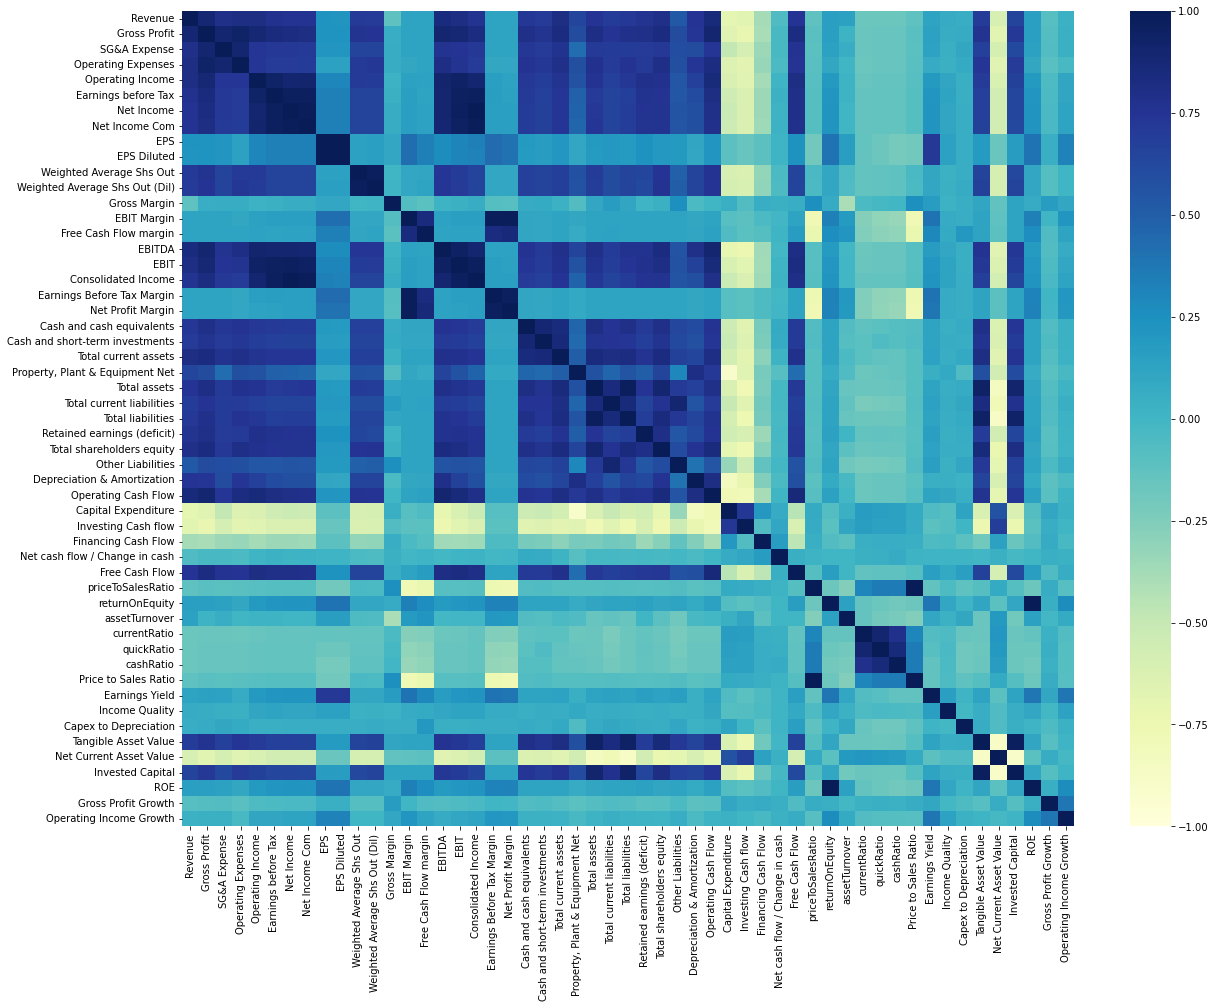

In [48]:
# Plot correlation matrix of output dataset
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(df_test2.corr(), annot=False, cmap='YlGnBu', vmin=-1, vmax=1, center=0, ax=ax)
plt.show()

In [49]:
# Add the sector column
df_out = df_test2.join(ds2014['Sector'])

# Add back the classification columns
df_out = df_out.join(class_data)

# Print information about dataset
#print(list(df_out))
#df_out.describe()

['Revenue', 'Gross Profit', 'SG&A Expense', 'Operating Expenses', 'Operating Income', 'Earnings before Tax', 'Net Income', 'Net Income Com', 'EPS', 'EPS Diluted', 'Weighted Average Shs Out', 'Weighted Average Shs Out (Dil)', 'Gross Margin', 'EBIT Margin', 'Free Cash Flow margin', 'EBITDA', 'EBIT', 'Consolidated Income', 'Earnings Before Tax Margin', 'Net Profit Margin', 'Cash and cash equivalents', 'Cash and short-term investments', 'Total current assets', 'Property, Plant & Equipment Net', 'Total assets', 'Total current liabilities', 'Total liabilities', 'Retained earnings (deficit)', 'Total shareholders equity', 'Other Liabilities', 'Depreciation & Amortization', 'Operating Cash Flow', 'Capital Expenditure', 'Investing Cash flow', 'Financing Cash Flow', 'Net cash flow / Change in cash', 'Free Cash Flow', 'priceToSalesRatio', 'returnOnEquity', 'assetTurnover', 'currentRatio', 'quickRatio', 'cashRatio', 'Price to Sales Ratio', 'Earnings Yield', 'Income Quality', 'Capex to Depreciation'

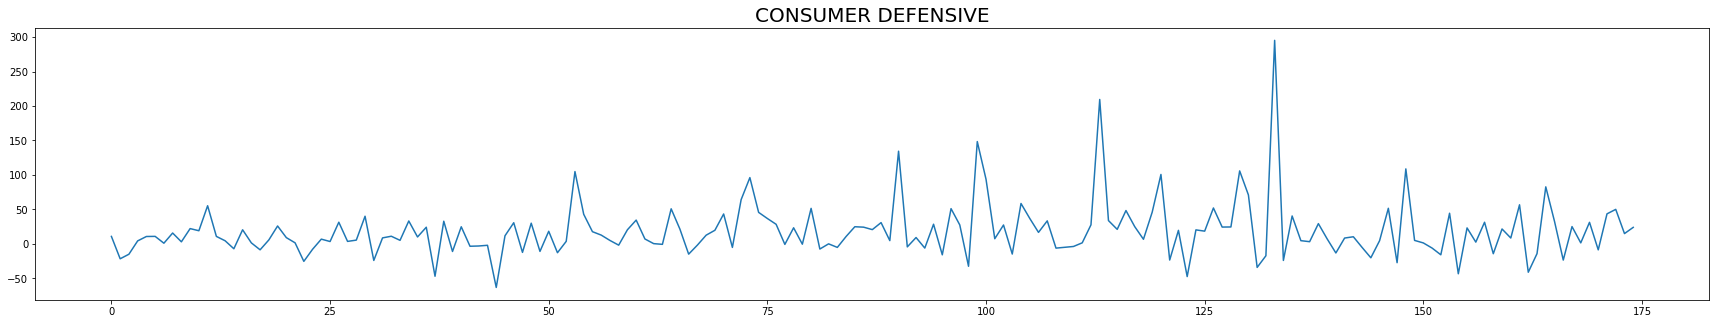

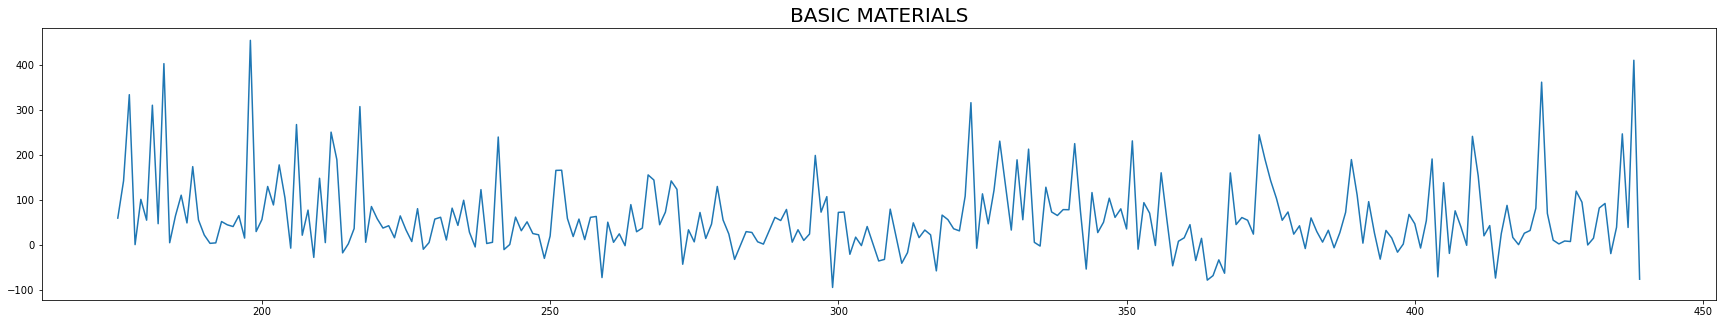

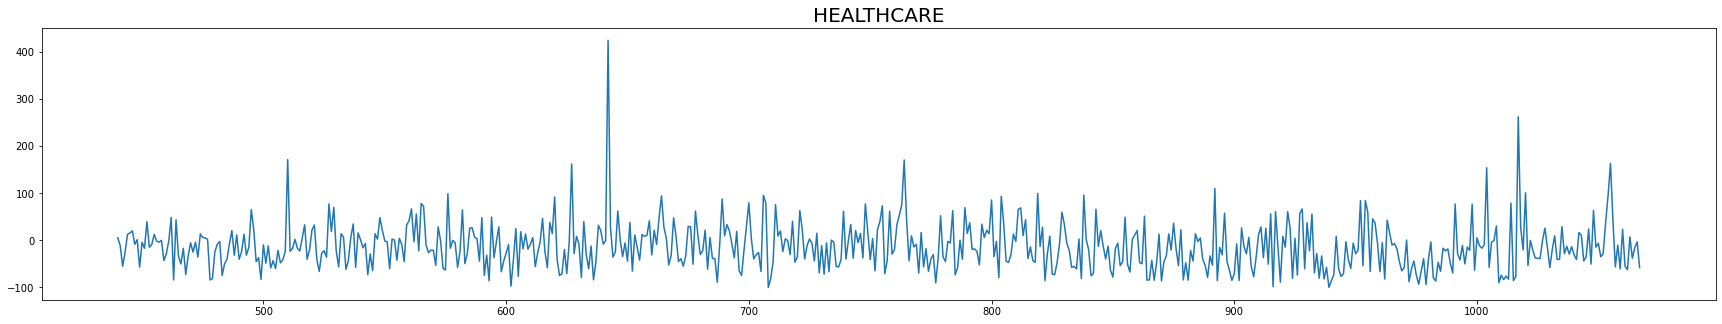

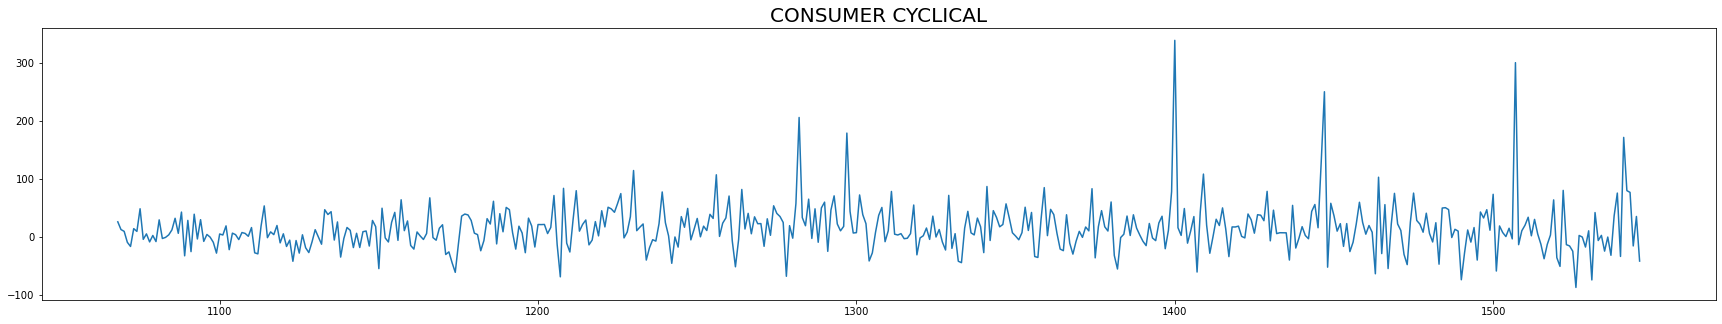

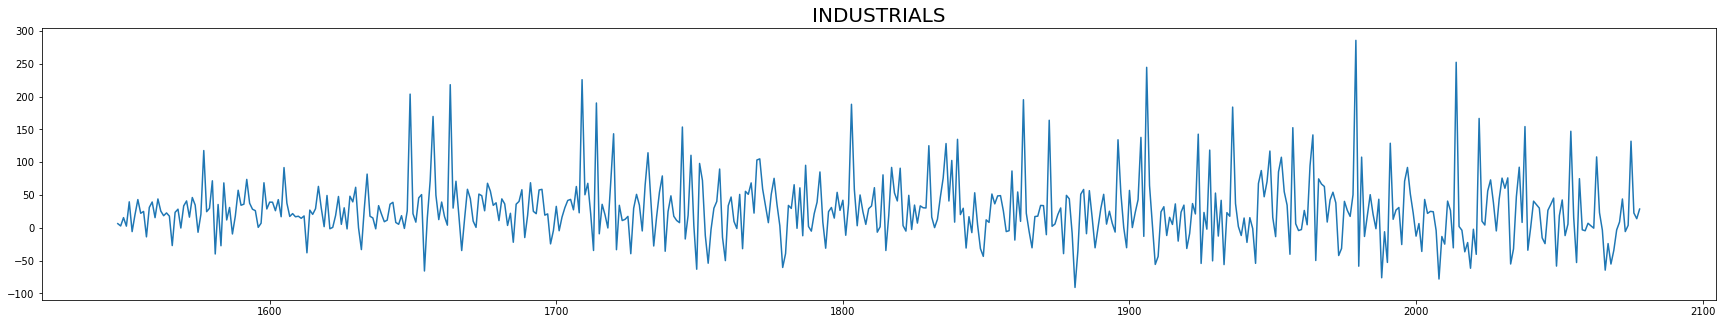

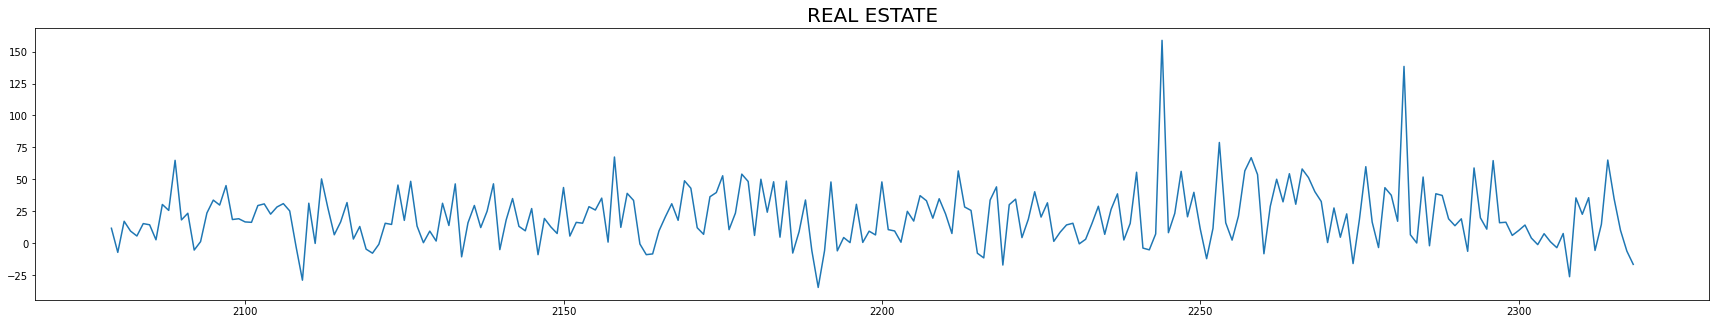

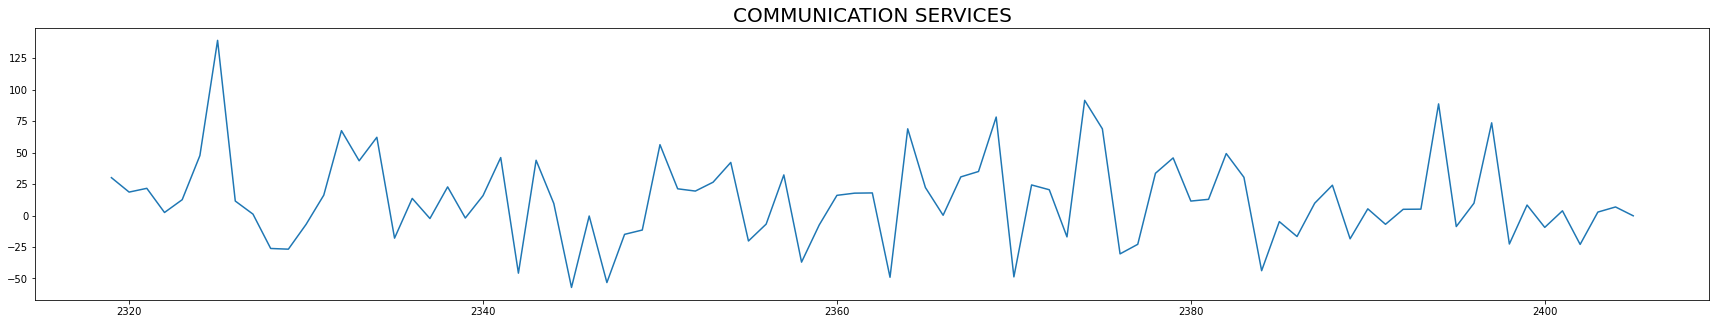

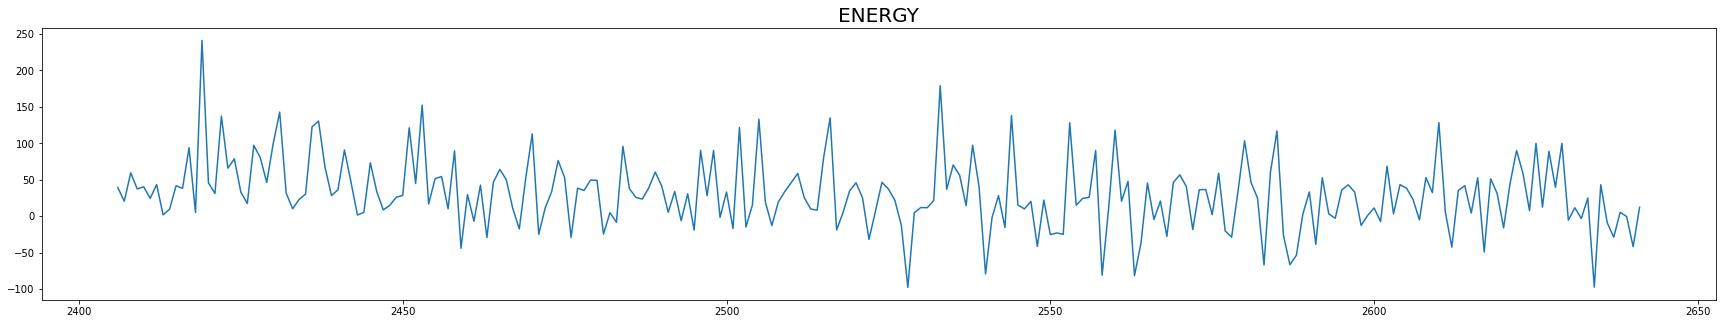

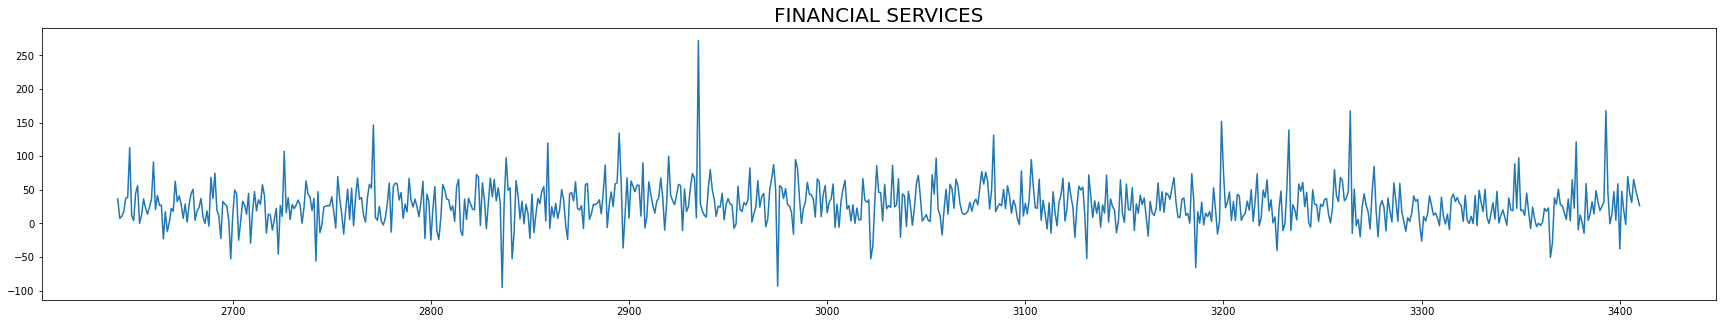

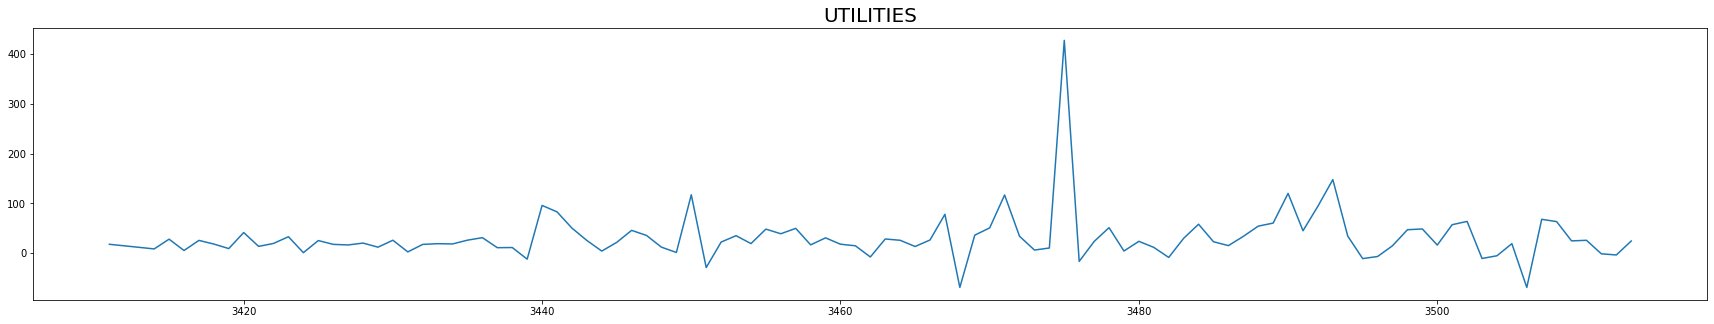

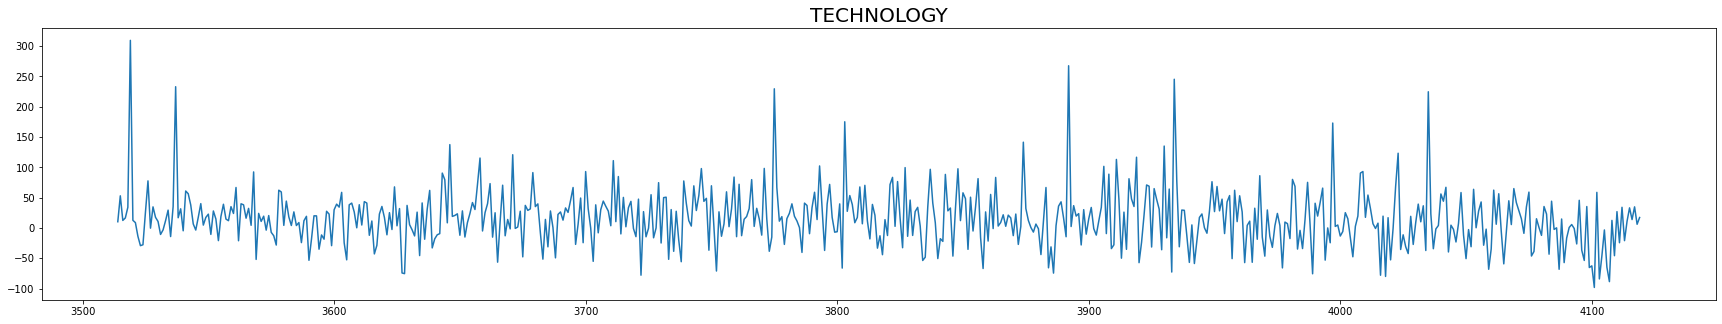

In [53]:
# Handle outliers which have more than 500% gain per year
df_out = (df_out[df_out["2016 PRICE VAR [%]"]<500])
dfp = df_out.loc[:, ['Sector', '2016 PRICE VAR [%]']]
sector_list = dfp["Sector"].unique()
for sector in sector_list:

    temp = dfp[dfp['Sector'] == sector]

    plt.figure(figsize=(30,5))
    plt.plot(temp['2016 PRICE VAR [%]'])
    plt.title(sector.upper(), fontsize=20)
    plt.show()

In [54]:
#df_out.to_csv("Cleaned_2015.csv")

In [67]:
sp500_2015_buy = -0.73+2.5
sp500_2015_sell = -0.73-2.5
df_out.loc[df_out["2016 PRICE VAR [%]"]>sp500_2015_buy, "Class"] = 2
df_out.loc[df_out["2016 PRICE VAR [%]"]<sp500_2015_sell, "Class"] = 0
df_out.loc[(df_out["2016 PRICE VAR [%]"] >= sp500_2015_sell) & (df_out["2016 PRICE VAR [%]"]<=sp500_2015_buy), "Class"] = 1

In [68]:
df_out.to_csv("Cleaned_2015.csv")